# PYMACEUTICALS

![title](Laboratory.jpg)

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
mouse_df = pd.read_csv(mouse_drug_data_to_load)
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


Read the Mouse and Drug Data and the Clinical Trial Data

In [3]:
trial_df = pd.read_csv(clinical_trial_data_to_load)
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
pyme_df = pd.merge(trial_df, mouse_df, how="left", on="Mouse ID")
# Display the data table for preview
pyme_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorVolGroup = pyme_df.groupby(["Drug","Timepoint"])
# Convert to DataFrame
tumorResponse_df = pd.DataFrame(tumorVolGroup["Tumor Volume (mm3)"].mean())
tumorResponse_df = tumorResponse_df.reset_index()
# Preview DataFrame
tumorResponse_df.head(11)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
tumorResponseErr_df = pd.DataFrame(tumorVolGroup["Tumor Volume (mm3)"].sem())
tumorResponseErr_df = tumorResponseErr_df.reset_index()
# Preview DataFrame
tumorResponseErr_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
tumorResponse_df = tumorResponse_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumorResponse_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [8]:
tumorResponseErr_df = tumorResponseErr_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumorResponseErr_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


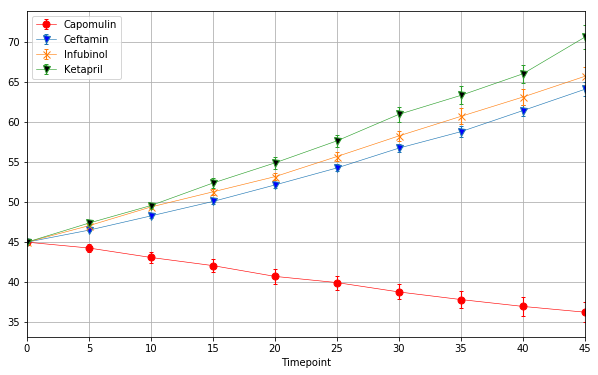

In [10]:
response = tumorResponse_df[["Capomulin","Ceftamin","Infubinol","Ketapril"]]
errors = tumorResponseErr_df[["Capomulin","Ceftamin","Infubinol","Ketapril"]]

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(10, 6))
kwargs = dict( capsize=2,elinewidth=1.1, linewidth=0.6, ms=7)

response["Capomulin"].plot( yerr = errors, fmt='-o', c='r', mfc='r', **kwargs, label='Capomulin',legend=True)
response["Ceftamin"].plot( yerr = errors, fmt='-v', mfc='b', **kwargs, label='Ceftamin',legend=True)
response["Infubinol"].plot( yerr = errors, fmt='-x', mfc='g', **kwargs, label='Infubinol',legend=True)
response["Ketapril"].plot( yerr = errors, fmt='-v', mfc='k',  **kwargs, label='Ketapril',legend=True)
plt.legend(loc='best')
plt.grid(True)
plt.show()


## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [13]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [15]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [16]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [18]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()